In [289]:
import io
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [290]:
#creating dataframe from dataset
df = pd.read_csv('features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [291]:
df = df.drop(['filename','length'], axis=1)
ynonhot = df["label"]

# generate all the unique genres and map them to an index 
enc = OneHotEncoder(sparse=False)
y = enc.fit_transform(df[["label"]])
y

minmaxscalar = preprocessing.MinMaxScaler()
df.loc[:, df.columns != 'label'] = minmaxscalar.fit_transform(df.loc[:, df.columns != 'label'])

df.head()
x,y = (df.iloc[:,df.columns != "label"],y)
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30)
X_train.shape

# Further split data into validation sets 
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test,test_size=0.33)
print(X_test.shape,y_test.shape)

(2007, 57) (2007, 10)


In [292]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [293]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8704534130543099


In [294]:
acc = []

# Calculating acc for K values between 1 and 57
for k in range(1,58):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    #Train the model using the training sets
    knn.fit(X_train, y_train)
    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Accuracy')

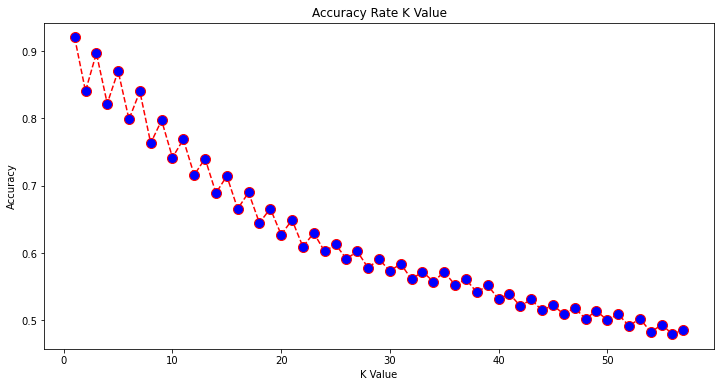

In [295]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 58), acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [296]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 58):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

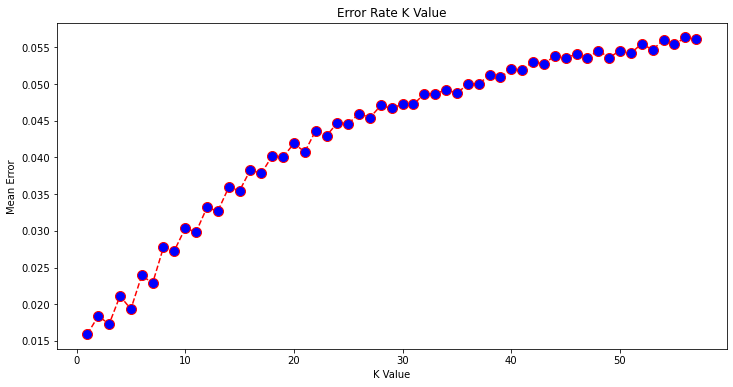

In [297]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 58), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [298]:
#k = 11
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=11)

#Train the model using the training sets
knn.fit(X_test, y_test)

#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [299]:
knn.score(X_test, y_test) #yikes what a low score, asian parents would bring the belt/slipper out

0.6103637269556552

In [300]:
#bias vs variance tradeoff: knns have low bias and high variance, prob overfitting - training data too well
#don't worry, time to use k-fold cross-validation to improve the score 
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=11)
#train model with cv of 20 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=20)#do I apply this on test or train??
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:",np.mean(cv_scores))

[0.75142857 0.76857143 0.75142857 0.75714286 0.79714286 0.75142857
 0.73714286 0.74       0.74       0.78571429 0.77142857 0.74571429
 0.76285714 0.77936963 0.75358166 0.73925501 0.7765043  0.7765043
 0.75071633 0.80515759]
cv_scores mean: 0.7620544412607448


In [301]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(2, 57)} #not including k = 1, highest accuracy, but everything else is bad 
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=20)
#fit model to data
knn_gscv.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56])})

In [302]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 3}

In [303]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8866025378632829

In [304]:
#k = 3
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_test, y_test)

#show first 5 model predictions on the test data
knn.predict(X_test)[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [305]:
knn.score(X_test, y_test) #way better 

0.8784255107125062